# Demo of Social Media Analytics

In [1]:
# Author : Praveen Vijayan , TCS-A&I 

Objective :

1. Exploratory ( Wordcloud)
2. Sentiment Analysis 
3. Exploratory ( Topic modeling)


# Import packages 

In [1]:
import re
import json
from pprint import pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
from text_preprocess import processTweet2,getStopWordList,replaceTwoOrMore
from textblob import TextBlob
import sys

# Load data

In [2]:
dataset = 'twitter_data.json' # Give the data set in json format 
#dataset = 'stream_google.json'

In [3]:
tweets = []
for line in open(dataset, 'r'):   
    #print(line)
    if not line.isspace():
        tweets.append(json.loads(line))

In [4]:
print(len(tweets))

3200


# Processing the tweets

* Generate random tweets from the data and clean the tweets ( Run this section again and again. Enjoy exploring. )

In [5]:
from random import randint
i = randint(1, len(tweets)) # For getting a random tweet from the data 
print('\033[1m'+"Tweet number : " + str(i) + '\033[0m' + "\n")
print('\033[1m'+"Original tweet : "+'\033[0m')
print(tweets[i]["text"].encode(sys.stdout.encoding, errors='replace'))    
print('\033[1m'+"Processed tweet :" + '\033[0m')
print(replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"]))).encode(sys.stdout.encoding, errors='replace'))


Tweet number : 1726

Original tweet : 
b'"Digital is on track, we\'re going strong." - CEO N.Chandra #TCSQ2'
Processed tweet :
b'digital is on track  we re going strong.  ceo n.chandra tcsq2'


# Stopword removal

In [6]:
STOPWORD_customized = {'rt','amp','tcs','http'}
from nltk.corpus import stopwords 
import string
stop = set(stopwords.words('english'))

In [7]:
words=' '
for i in range (0,len(tweets)):
    temp = replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
    temp = " ".join([i for i in temp.lower().split() if i not in stop])
    temp = " ".join([i for i in temp.split() if i not in STOPWORD_customized])
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    temp = shortword.sub('', temp)    
    words = words + temp 


# 1 .Generate Wordcloud

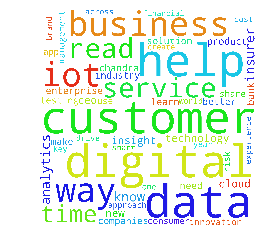

In [51]:
wordcloud = WordCloud(
    #font_path='Xerox Sans Serif Wide Bold Oblique.ttf',
    #stopwords=STOPWORDS.union(stopword),
    background_color='white',
    #mask = logomask,
    max_words=50,
    width=4000,
    height=4000
).generate(words)

plt.imshow(wordcloud.recolor(random_state=3))
plt.axis('off')
#plt.savefig('./tweetcloud.png', dpi=300)
plt.show()

# 2. Sentiment Analysis

In [9]:
from textblob import TextBlob
import sys

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(tweet)
    # set sentiment
    if analysis.sentiment.polarity >= 0.3:
        return 'positive'
    elif (analysis.sentiment.polarity < 0):
        return 'negative'
    else:
        return 'neutral'


# 2.1 Sentiment Analysis of tweets ( Iterate this part )

# example 1 :

In [10]:
from random import randint
i = randint(1, len(tweets)) # For getting a random tweet from the data 

print('\033[1m'+"Tweet number : " + str(i) + '\033[0m' + "\n")
print('\033[1m'+"Original tweet : "+'\033[0m')
print(tweets[i]["text"].encode(sys.stdout.encoding, errors='replace'))    

print('\033[1m'+"Processed tweet :" + '\033[0m')
print(replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"]))).encode(sys.stdout.encoding, errors='replace'))
temp= replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
print("\n")
print('\033[1m'+"Sentiment of the tweet :" + '\033[0m' )

print(get_tweet_sentiment(temp) + "(" + " score = " + str(TextBlob(temp).sentiment.polarity) + ")")

Tweet number : 966

Original tweet : 
b'How can IoT, social media, mobility&amp; analytics help create a smart spare parts supply chain? https://t.co/5Fp05mOSYk https://t.co/Mka1eERXcz'
Processed tweet :
b'how can iot  social media  mobility amp  analytics help create a smart spare parts supply chain  '


Sentiment of the tweet :
neutral( score = 0.1238095238095238)


# example 2:

In [13]:
from random import randint
i = randint(1, len(tweets)) # For getting a random tweet from the data 

print('\033[1m'+"Tweet number : " + str(i) + '\033[0m' + "\n")
print('\033[1m'+"Original tweet : "+'\033[0m')
print(tweets[i]["text"].encode(sys.stdout.encoding, errors='replace'))    

print('\033[1m'+"Processed tweet :" + '\033[0m')
print(replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"]))).encode(sys.stdout.encoding, errors='replace'))
temp= replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
print("\n")
print('\033[1m'+"Sentiment of the tweet :" + '\033[0m' )

print(get_tweet_sentiment(temp) + "(" + " score = " + str(TextBlob(temp).sentiment.polarity) + ")")

Tweet number : 491

Original tweet : 
b'#Fintechs are racing ahead. Traditional banks must do this to stay in the game. #openAPI  https://t.co/KIAiKnfcQx https://t.co/7opweedUnN'
Processed tweet :
b'fintechs are racing ahead. traditional banks must do this to stay in the game. openapi '


Sentiment of the tweet :
negative( score = -0.2)


# example 3:

In [25]:
from random import randint
i = randint(1, len(tweets)) # For getting a random tweet from the data 

print('\033[1m'+"Tweet number : " + str(i) + '\033[0m' + "\n")
print('\033[1m'+"Original tweet : "+'\033[0m')
print(tweets[i]["text"].encode(sys.stdout.encoding, errors='replace'))    

print('\033[1m'+"Processed tweet :" + '\033[0m')
print(replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"]))).encode(sys.stdout.encoding, errors='replace'))
temp= replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
print("\n")
print('\033[1m'+"Sentiment of the tweet :" + '\033[0m' )

print(get_tweet_sentiment(temp) + "(" + " score = " + str(TextBlob(temp).sentiment.polarity) + ")")

Tweet number : 2873

Original tweet : 
b'RT @People_TCS: Meet @Amaljfatani! She followed her passion and, today, is one of the most remarkable #WomenInTech. https://t.co/pQnZhz0kHg'
Processed tweet :
b'rt meet she followed her passion and  today  is one of the most remarkable womenintech. '


Sentiment of the tweet :
positive( score = 0.625)


# 2.2 Enter any text and check its sentiment

In [26]:
text_for_checking_sentiment = "TCS is doing good"
#text_for_checking_sentiment = "TCS is doing bad"


In [27]:
print('\033[1m'+"Sentiment of the text :" + '\033[0m')
print(get_tweet_sentiment(text_for_checking_sentiment) + "(" + " score = " + str(TextBlob(text_for_checking_sentiment).sentiment.polarity) + ")")

Sentiment of the text :
positive( score = 0.7)


#  2.3 Summary of twitter sentiment

In [28]:
print('\033[1m'+"Number of tweets handled : "+ str(len(tweets))+ '\033[0m')

Number of tweets handled : 3200


In [29]:
pos=neg=neu=0
sentiment_all = []
for i in range (0,len(tweets)):
    temp= replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
    sentiment= get_tweet_sentiment(temp)
    sentiment_all.append(TextBlob(temp).sentiment.polarity)
    
    if sentiment == 'positive':
        pos = pos + 1
    if sentiment == 'negative':
        neg = neg + 1
    if sentiment == 'neutral':
        neu = neu + 1
    

# 2.3.1 Tweets sentiment distribution chart

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['neutral','positive','negative']
values = [neu,pos,neg]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='Tweets sentiment distribution chart')

# 2.3.2 Tweets sentiment variation chart ( -1 to +1)

In [31]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = len(tweets)
random_x = np.linspace(1, N, N)
random_y = sentiment_all

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y
)

data = [trace]

py.iplot(data, filename='basic-line')

# 3. Topic modeling

In [32]:
tweets_topic = []

words=' '
for i in range (0,len(tweets)):
    temp= replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
    tweets_topic.append(temp) 

In [33]:
doc_complete = tweets_topic

In [34]:
STOPWORD_customized = {'rt','amp','tcs','http','tc'}

In [35]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    normalized = " ".join([i for i in normalized.split() if i not in STOPWORD_customized])
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    normalized = shortword.sub('', normalized)
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

# Hyper parameters for tuning topic model 

In [42]:
num_topics=10 # number of topics required
num_words=10  # number of words in each topic
iter = 50 # Passes for LDA .. higher the better 

In [43]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [44]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=iter)

# Topics : 

In [45]:
#ldamodel.print_topics(num_topics=num_topics, num_words=num_words)

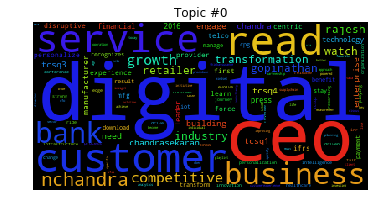

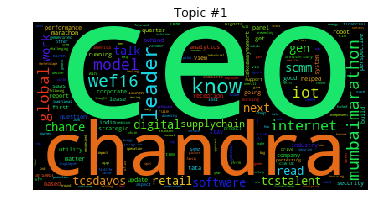

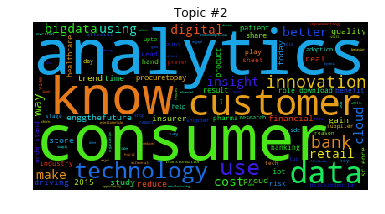

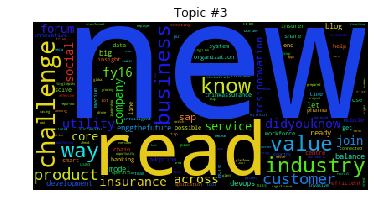

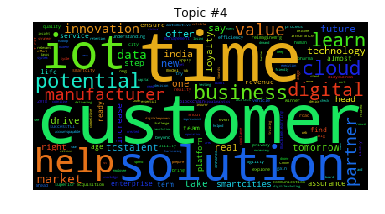

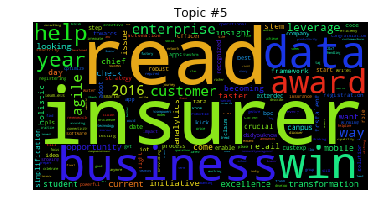

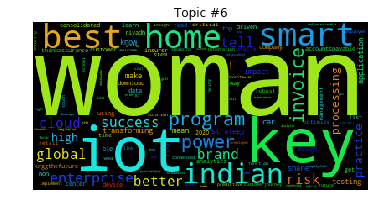

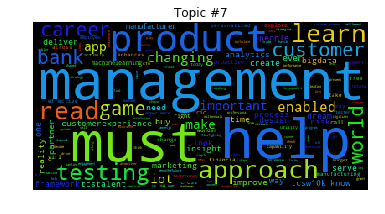

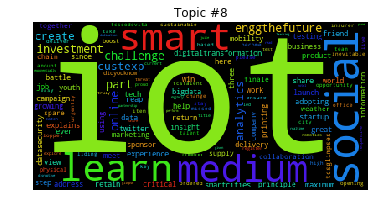

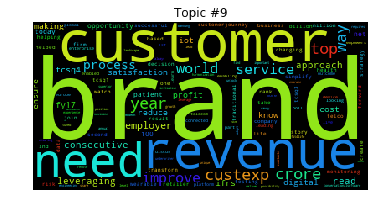

In [46]:
# lda is assumed to be the variable holding the LdaModel object
import matplotlib.pyplot as plt
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(ldamodel.show_topic(t, 200)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()